In [1]:
import matplotlib.pyplot as plt
import ast
import subprocess
import random
import seaborn as sns
%config InlineBackend.figure_format='retina'

In [2]:
with open('data/1000_most_common_kmers.py', 'r') as f:
    most_common = ast.literal_eval(f.read())

In [3]:
# Convert into list of kmers separated by space
temp = []
for kmc in most_common:
    temp.append(kmc[0])
kms_str = str(temp).replace(',', "").replace("'", '')[1:-1]

In [4]:
files = ["02H043", "03H090", "04H120", "05H072"] # a few random patient IDs
profiles = []
for f in files:
    jf = f"/u/leucegene/data/rnaseq/jellyfish/EXT001/{f}/2.2.3/kmers.k31.CL2.jf"
    # Query for specific kmer counts from each file
    cmd = f"jellyfish query {jf} {kms_str}"
    output = subprocess.check_output(cmd, shell=True).decode("utf-8")
    # Convert to object
    profile = {}
    for line in output.splitlines():
        km, cnt = line.split()
        profile[km] = int(cnt)
    profiles.append(profile)
    print(f"Queried {f}...")
print("Done with the queries!")

Queried 02H043...
Queried 03H090...
Queried 04H120...
Queried 05H072...
Done with the queries!


In [5]:
def flatten2list(object):
    # Flattens a nested collection object into a one dimensional list
    gather = []
    for item in object:
        if isinstance(item, (list, tuple, set)):
            gather.extend(flatten2list(item))            
        else:
            gather.append(item)
    return gather

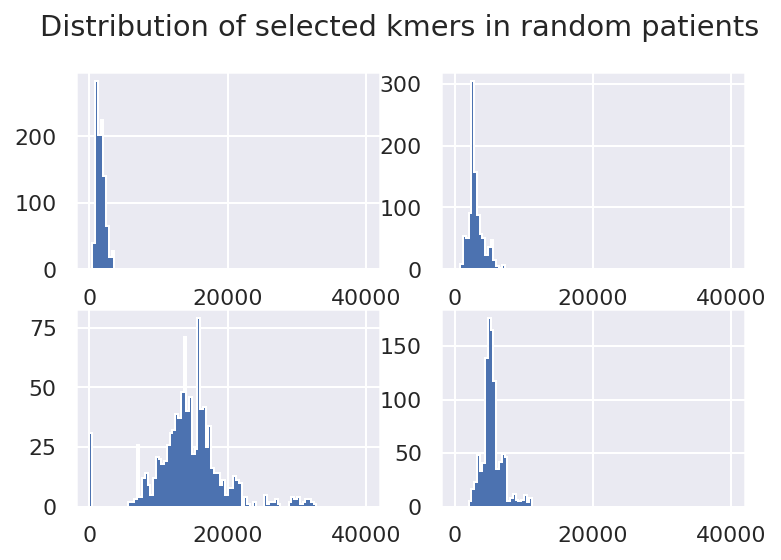

In [28]:
# Make distribution graph of kmer frequencies
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle("Distribution of selected kmers in random patients")
i = 0
axes = [ax1, ax2, ax3, ax4]
for profile in profiles:
    axes[i].hist(list(profile.values()), bins=100, histtype='stepfilled', range=(0, 40000))
    i += 1
sns.set()
plt.show()

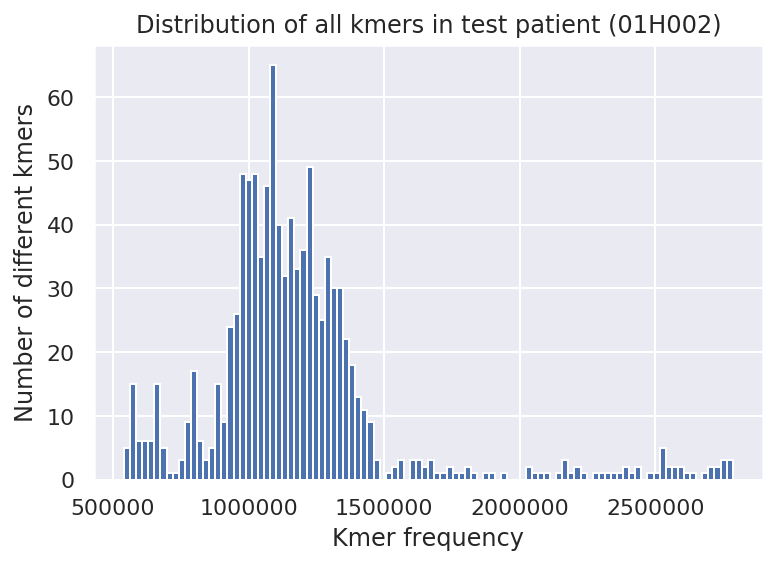

In [30]:
# Visually compare with distribution of test patient
test = [kmc[1] for kmc in most_common]
plt.hist(test, bins=100)
plt.title("Distribution of all kmers in test patient (01H002)")
plt.xlabel("Kmer frequency")
plt.ylabel("Number of different kmers")
plt.show()

In [31]:
def query(patients, kms):
    # Queries jellyfish files of given patients for given kmers
    # kmers must be separated by spaces
    out = []
    for p in patients:
        jf = f"/u/leucegene/data/rnaseq/jellyfish/EXT001/{p}/2.2.3/kmers.k31.CL2.jf"
        cmd = f"jellyfish query {jf} {kms}"
        output = subprocess.check_output(cmd, shell=True).decode("utf-8")
        patient_kms = {}
        for line in output.splitlines():
            km, cnt = line.split()
            patient_kms[km] = int(cnt)
        out.append(patient_kms)
    return out

In [32]:
# Query ALL patients for some particular kmer
def query_particular(km):
    with open("data/patient_list.txt") as f:
        patient_list = f.read().split()
    data = []
    return query(patient_list, km)

In [33]:
def get_values(all_pts):
    """
    Given the query output of all patients for a single kmer, returns only a list of integers to plot.
    """
    return [list(i.values())[0] for i in all_pts]

In [ ]:
# Picks 9 random kmers from the list of 1000, then query them across all patients & plot the distribution for each kmer
fig, ax = plt.subplots(3, 3)
ax = ax.reshape(-1).tolist()
i = 0
for axis in ax:
    rdm = random.randint(0, 999)
    km = most_common[rdm][0]
    values = get_values(query_particular(km))
    i += 1
    print(f"Done with query {i}...")
    axis.hist(values, bins=100, range=(0, 2000000))
    axis.xscale("log")
plt.show()